<center><img src="https://is1-ssl.mzstatic.com/image/thumb/Purple122/v4/05/e7/67/05e76784-3364-b535-7e20-b3f4946a56b6/AppIcon-0-0-1x_U007emarketing-0-0-0-7-0-0-sRGB-0-0-0-GLES2_U002c0-512MB-85-220-0-0.png/434x0w.webp" style="height:150px"></center>

<hr style="border-width:2px;border-color:#75DFC1">
<center><h1>Test Technique Data Scientist : Multi-classification</h1></center>
<center><h2> ADEIKALAM Pierre </h2></center>
<hr style="border-width:2px;border-color:#75DFC1">


# Objectif 

L'objectif de ce test est de modéliser la variable "target" fournie dans un jeu de données nommé "train.csv", pour ensuite réaliser sa prédiction sur des individus contenus dans le jeu "test.csv".

# Étude exploratoire des variables à disposition

Les variables explicatives du jeu de données ne sont pas documentées et leur relation avec la variable cible est donc purement spéculatif.

L'étude des variables portera donc uniquement sur leur qualité et leur exploitabilité pour la modélisation.

Les critères utilisés pour évaluer l'exploitabilité d'une variable sont les suivants:
* Intersection et inclusion des jeux de données d'entraînement et de test.
  * Les modalités présentes dans les variables catégorielles du jeu de test doivent être en grande partie présentes dans le jeu d'entraînement afin que les techniques d'encodage utilisées pour l'entraînement restent valides pendant la phase de test.
  * On définit l'intersection comme la métrique quantifiant le pourcentage de modalités présentes à la fois dans le jeu d'entraînement et le jeu de test, tandis que l'inclusion est le pourcentage de modalités du jeu de test présentes dans le jeu d'entraînement.
  * Une inclusion élevée nous garantit que les techniques d'encodage fonctionneront pendant la phase de test.
  * Une intersection élevée nous garantit que l'encodage est pertinent.

<br>

* Entropie des variables catégorielles:
  * Nous souhaitons que les variables puissent expliquer des comportements différents représentés par la variable cible. Les variables à entropie extrêmement faible sont trop homogènes et donc n'apportent pas d'information significative pour permettre de discriminer les individus selon la variable cible.

<br>


* Complétude des données:
  * Comme pour l'entropie, les variables dont la très grande majorité des entrées sont manquantes ne permettent pas d'apporter une information significative pour la modélisation.


Nous allons commencer par une analyse de la complétude des données.

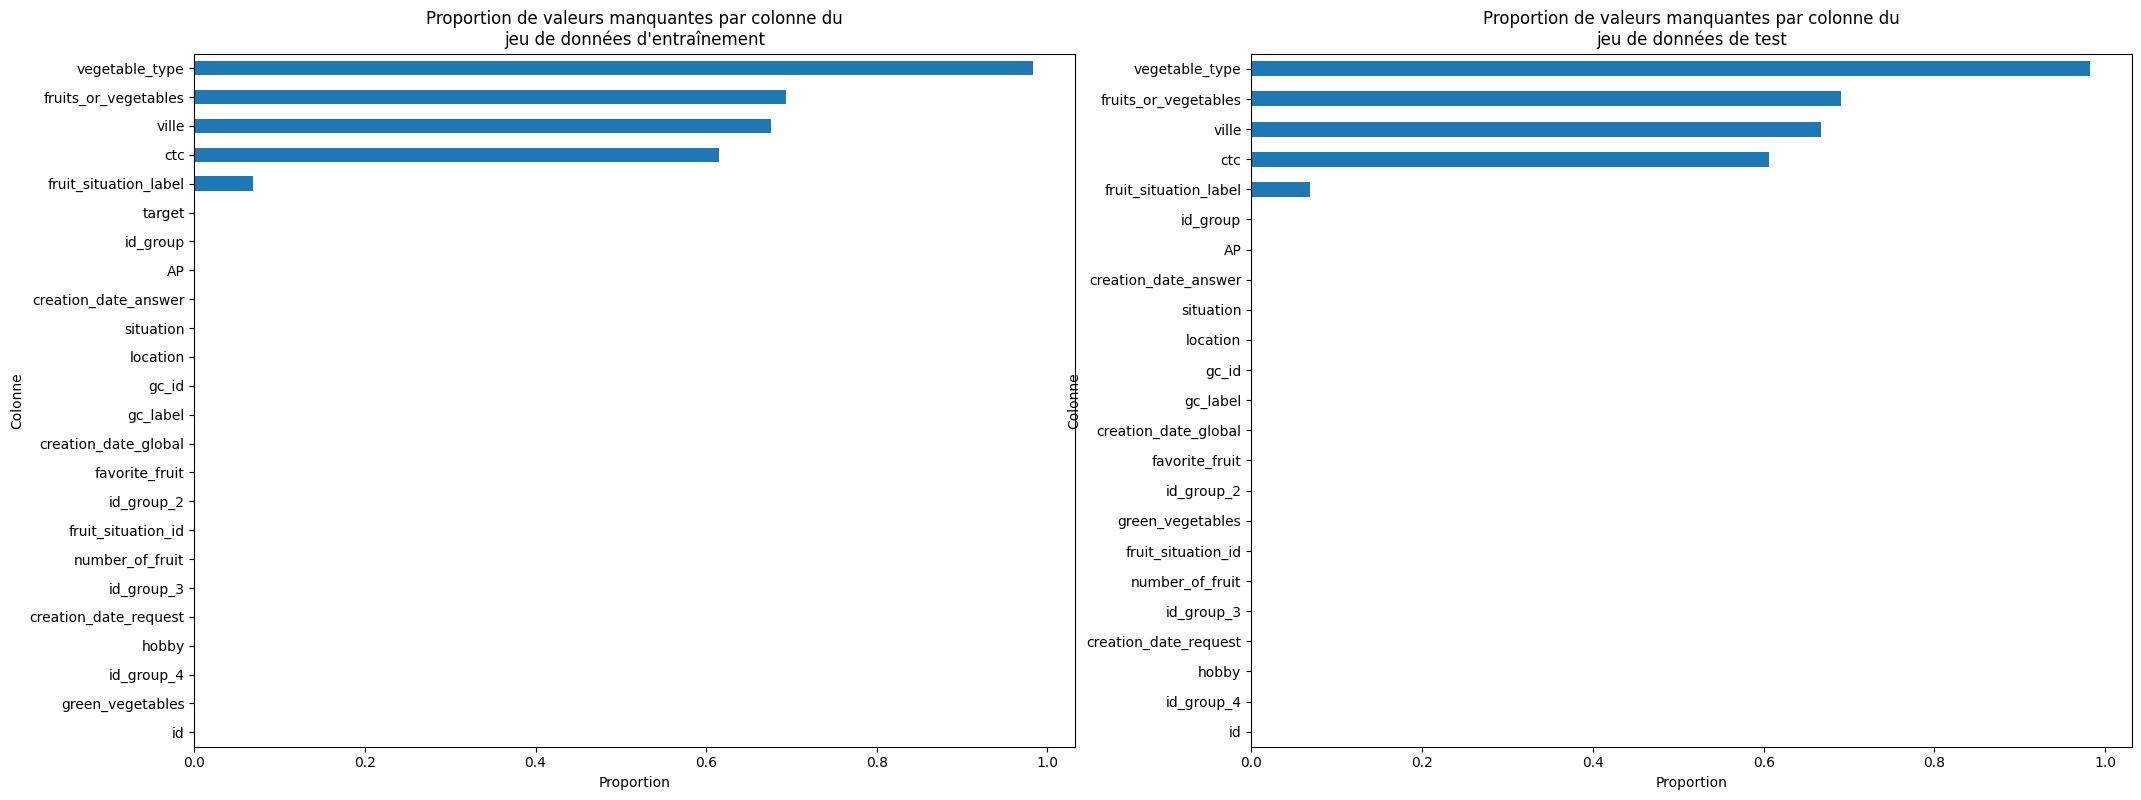

In [403]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

plt.subplot(1, 2, 1)
train.isna().mean().sort_values().plot(kind = 'barh')
plt.title("Proportion de valeurs manquantes par colonne du\njeu de données d'entraînement")
plt.xlabel("Proportion")
plt.ylabel("Colonne")

plt.subplot(1, 2, 2)
test.isna().mean().sort_values().plot(kind = 'barh')
plt.title("Proportion de valeurs manquantes par colonne du\njeu de données de test")
plt.xlabel("Proportion")
plt.ylabel("Colonne")


fig = plt.gcf()
fig.set_size_inches(25, 9)

D'après les graphes ci-dessus, nous remarquons que 4 variables ("vegetable_type", "fruits_or_vegetables", "ville", "ctc") contiennent plus de 60% de valeurs manquantes.

Regardons maintenant les niveaux d'intersection, d'inclusion et d'entropie des variables du jeu de données.

<style type="text/css">
#T_6aa87_row0_col0, #T_6aa87_row0_col1, #T_6aa87_row1_col2, #T_6aa87_row2_col0, #T_6aa87_row2_col1, #T_6aa87_row3_col2, #T_6aa87_row4_col2, #T_6aa87_row8_col0, #T_6aa87_row8_col1, #T_6aa87_row9_col0, #T_6aa87_row9_col1, #T_6aa87_row10_col0, #T_6aa87_row10_col1, #T_6aa87_row11_col2, #T_6aa87_row14_col2, #T_6aa87_row15_col0, #T_6aa87_row15_col1, #T_6aa87_row15_col2, #T_6aa87_row16_col0, #T_6aa87_row16_col1, #T_6aa87_row17_col0, #T_6aa87_row17_col1, #T_6aa87_row18_col2, #T_6aa87_row19_col0, #T_6aa87_row19_col1, #T_6aa87_row20_col0, #T_6aa87_row20_col1, #T_6aa87_row21_col2, #T_6aa87_row22_col2 {
  background-color: pink;
}
#T_6aa87_row0_col2, #T_6aa87_row1_col0, #T_6aa87_row1_col1, #T_6aa87_row2_col2, #T_6aa87_row3_col0, #T_6aa87_row3_col1, #T_6aa87_row4_col0, #T_6aa87_row4_col1, #T_6aa87_row5_col0, #T_6aa87_row5_col1, #T_6aa87_row5_col2, #T_6aa87_row6_col0, #T_6aa87_row6_col1, #T_6aa87_row6_col2, #T_6aa87_row7_col0, #T_6aa87_row7_col1, #T_6aa87_row7_col2, #T_6aa87_row8_col2, #T_6aa87_row9_col2, #T_6aa87_row10_col2, #T_6aa87_row11_col0, #T_6aa87_row11_col1, #T_6aa87_row12_col0, #T_6aa87_row12_col1, #T_6aa87_row12_col2, #T_6aa87_row13_col0, #T_6aa87_row13_col1, #T_6aa87_row13_col2, #T_6aa87_row14_col0, #T_6aa87_row14_col1, #T_6aa87_row16_col2, #T_6aa87_row17_col2, #T_6aa87_row18_col0, #T_6aa87_row18_col1, #T_6aa87_row19_col2, #T_6aa87_row20_col2, #T_6aa87_row21_col0, #T_6aa87_row21_col1, #T_6aa87_row22_col0, #T_6aa87_row22_col1 {
  background-color: lightgreen;
}
</style>
<table id="T_6aa87">
  <thead>
    <tr>
      <th class="blank level0" >&nbsp;</th>
      <th id="T_6aa87_level0_col0" class="col_heading level0 col0" >intersection</th>
      <th id="T_6aa87_level0_col1" class="col_heading level0 col1" >inclusion</th>
      <th id="T_6aa87_level0_col2" class="col_heading level0 col2" >entropy</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th id="T_6aa87_level0_row0" class="row_heading level0 row0" >id</th>
      <td id="T_6aa87_row0_col0" class="data row0 col0" >0.000000</td>
      <td id="T_6aa87_row0_col1" class="data row0 col1" >0.000000</td>
      <td id="T_6aa87_row0_col2" class="data row0 col2" >1.000000</td>
    </tr>
    <tr>
      <th id="T_6aa87_level0_row1" class="row_heading level0 row1" >AP</th>
      <td id="T_6aa87_row1_col0" class="data row1 col0" >1.000000</td>
      <td id="T_6aa87_row1_col1" class="data row1 col1" >1.000000</td>
      <td id="T_6aa87_row1_col2" class="data row1 col2" >0.002266</td>
    </tr>
    <tr>
      <th id="T_6aa87_level0_row2" class="row_heading level0 row2" >creation_date_answer</th>
      <td id="T_6aa87_row2_col0" class="data row2 col0" >0.011768</td>
      <td id="T_6aa87_row2_col1" class="data row2 col1" >0.023295</td>
      <td id="T_6aa87_row2_col2" class="data row2 col2" >0.995018</td>
    </tr>
    <tr>
      <th id="T_6aa87_level0_row3" class="row_heading level0 row3" >situation</th>
      <td id="T_6aa87_row3_col0" class="data row3 col0" >1.000000</td>
      <td id="T_6aa87_row3_col1" class="data row3 col1" >1.000000</td>
      <td id="T_6aa87_row3_col2" class="data row3 col2" >0.020211</td>
    </tr>
    <tr>
      <th id="T_6aa87_level0_row4" class="row_heading level0 row4" >ctc</th>
      <td id="T_6aa87_row4_col0" class="data row4 col0" >1.000000</td>
      <td id="T_6aa87_row4_col1" class="data row4 col1" >1.000000</td>
      <td id="T_6aa87_row4_col2" class="data row4 col2" >0.074981</td>
    </tr>
    <tr>
      <th id="T_6aa87_level0_row5" class="row_heading level0 row5" >location</th>
      <td id="T_6aa87_row5_col0" class="data row5 col0" >0.980000</td>
      <td id="T_6aa87_row5_col1" class="data row5 col1" >0.989899</td>
      <td id="T_6aa87_row5_col2" class="data row5 col2" >0.397357</td>
    </tr>
    <tr>
      <th id="T_6aa87_level0_row6" class="row_heading level0 row6" >gc_id</th>
      <td id="T_6aa87_row6_col0" class="data row6 col0" >1.000000</td>
      <td id="T_6aa87_row6_col1" class="data row6 col1" >1.000000</td>
      <td id="T_6aa87_row6_col2" class="data row6 col2" >0.146160</td>
    </tr>
    <tr>
      <th id="T_6aa87_level0_row7" class="row_heading level0 row7" >gc_label</th>
      <td id="T_6aa87_row7_col0" class="data row7 col0" >1.000000</td>
      <td id="T_6aa87_row7_col1" class="data row7 col1" >1.000000</td>
      <td id="T_6aa87_row7_col2" class="data row7 col2" >0.146160</td>
    </tr>
    <tr>
      <th id="T_6aa87_level0_row8" class="row_heading level0 row8" >creation_date_global</th>
      <td id="T_6aa87_row8_col0" class="data row8 col0" >0.278830</td>
      <td id="T_6aa87_row8_col1" class="data row8 col1" >0.435599</td>
      <td id="T_6aa87_row8_col2" class="data row8 col2" >0.934883</td>
    </tr>
    <tr>
      <th id="T_6aa87_level0_row9" class="row_heading level0 row9" >id_group</th>
      <td id="T_6aa87_row9_col0" class="data row9 col0" >0.273683</td>
      <td id="T_6aa87_row9_col1" class="data row9 col1" >0.428994</td>
      <td id="T_6aa87_row9_col2" class="data row9 col2" >0.936299</td>
    </tr>
    <tr>
      <th id="T_6aa87_level0_row10" class="row_heading level0 row10" >id_group_2</th>
      <td id="T_6aa87_row10_col0" class="data row10 col0" >0.280888</td>
      <td id="T_6aa87_row10_col1" class="data row10 col1" >0.437997</td>
      <td id="T_6aa87_row10_col2" class="data row10 col2" >0.934951</td>
    </tr>
    <tr>
      <th id="T_6aa87_level0_row11" class="row_heading level0 row11" >favorite_fruit</th>
      <td id="T_6aa87_row11_col0" class="data row11 col0" >1.000000</td>
      <td id="T_6aa87_row11_col1" class="data row11 col1" >1.000000</td>
      <td id="T_6aa87_row11_col2" class="data row11 col2" >0.057997</td>
    </tr>
    <tr>
      <th id="T_6aa87_level0_row12" class="row_heading level0 row12" >fruit_situation_id</th>
      <td id="T_6aa87_row12_col0" class="data row12 col0" >1.000000</td>
      <td id="T_6aa87_row12_col1" class="data row12 col1" >1.000000</td>
      <td id="T_6aa87_row12_col2" class="data row12 col2" >0.165860</td>
    </tr>
    <tr>
      <th id="T_6aa87_level0_row13" class="row_heading level0 row13" >fruit_situation_label</th>
      <td id="T_6aa87_row13_col0" class="data row13 col0" >1.000000</td>
      <td id="T_6aa87_row13_col1" class="data row13 col1" >1.000000</td>
      <td id="T_6aa87_row13_col2" class="data row13 col2" >0.165860</td>
    </tr>
    <tr>
      <th id="T_6aa87_level0_row14" class="row_heading level0 row14" >fruits_or_vegetables</th>
      <td id="T_6aa87_row14_col0" class="data row14 col0" >1.000000</td>
      <td id="T_6aa87_row14_col1" class="data row14 col1" >1.000000</td>
      <td id="T_6aa87_row14_col2" class="data row14 col2" >0.074403</td>
    </tr>
    <tr>
      <th id="T_6aa87_level0_row15" class="row_heading level0 row15" >number_of_fruit</th>
      <td id="T_6aa87_row15_col0" class="data row15 col0" >0.900000</td>
      <td id="T_6aa87_row15_col1" class="data row15 col1" >0.900000</td>
      <td id="T_6aa87_row15_col2" class="data row15 col2" >0.083765</td>
    </tr>
    <tr>
      <th id="T_6aa87_level0_row16" class="row_heading level0 row16" >id_group_3</th>
      <td id="T_6aa87_row16_col0" class="data row16 col0" >0.870270</td>
      <td id="T_6aa87_row16_col1" class="data row16 col1" >0.938228</td>
      <td id="T_6aa87_row16_col2" class="data row16 col2" >0.602132</td>
    </tr>
    <tr>
      <th id="T_6aa87_level0_row17" class="row_heading level0 row17" >creation_date_request</th>
      <td id="T_6aa87_row17_col0" class="data row17 col0" >0.011662</td>
      <td id="T_6aa87_row17_col1" class="data row17 col1" >0.023089</td>
      <td id="T_6aa87_row17_col2" class="data row17 col2" >0.995031</td>
    </tr>
    <tr>
      <th id="T_6aa87_level0_row18" class="row_heading level0 row18" >hobby</th>
      <td id="T_6aa87_row18_col0" class="data row18 col0" >1.000000</td>
      <td id="T_6aa87_row18_col1" class="data row18 col1" >1.000000</td>
      <td id="T_6aa87_row18_col2" class="data row18 col2" >0.007480</td>
    </tr>
    <tr>
      <th id="T_6aa87_level0_row19" class="row_heading level0 row19" >id_group_4</th>
      <td id="T_6aa87_row19_col0" class="data row19 col0" >0.273662</td>
      <td id="T_6aa87_row19_col1" class="data row19 col1" >0.428967</td>
      <td id="T_6aa87_row19_col2" class="data row19 col2" >0.936103</td>
    </tr>
    <tr>
      <th id="T_6aa87_level0_row20" class="row_heading level0 row20" >ville</th>
      <td id="T_6aa87_row20_col0" class="data row20 col0" >0.568600</td>
      <td id="T_6aa87_row20_col1" class="data row20 col1" >0.738971</td>
      <td id="T_6aa87_row20_col2" class="data row20 col2" >0.210784</td>
    </tr>
    <tr>
      <th id="T_6aa87_level0_row21" class="row_heading level0 row21" >green_vegetables</th>
      <td id="T_6aa87_row21_col0" class="data row21 col0" >1.000000</td>
      <td id="T_6aa87_row21_col1" class="data row21 col1" >1.000000</td>
      <td id="T_6aa87_row21_col2" class="data row21 col2" >0.008680</td>
    </tr>
    <tr>
      <th id="T_6aa87_level0_row22" class="row_heading level0 row22" >vegetable_type</th>
      <td id="T_6aa87_row22_col0" class="data row22 col0" >1.000000</td>
      <td id="T_6aa87_row22_col1" class="data row22 col1" >1.000000</td>
      <td id="T_6aa87_row22_col2" class="data row22 col2" >0.010112</td>
    </tr>
  </tbody>
</table>

Pour l'analyse suivante, nous regarderons également le nombre de modalités uniques pour chaque colonne du jeu de données d'entraînement : 

|                       |   Nombre de modalités uniques |
|:----------------------|------------------------------:|
| id                    |                         25000 |
| AP                    |                             2 |
| creation_date_answer  |                         24278 |
| situation             |                             8 |
| ctc                   |                             2 |
| location              |                            99 |
| gc_id                 |                            12 |
| gc_label              |                            12 |
| creation_date_global  |                         15680 |
| id_group              |                         15844 |
| id_group_2            |                         15675 |
| favorite_fruit        |                             2 |
| fruit_situation_id    |                            22 |
| fruit_situation_label |                            21 |
| fruits_or_vegetables  |                             2 |
| number_of_fruit       |                             9 |
| id_group_3            |                           872 |
| creation_date_request |                         24280 |
| hobby                 |                             3 |
| id_group_4            |                         15831 |
| ville                 |                           564 |
| green_vegetables      |                             2 |
| vegetable_type        |                             6 |
| target                |                             4 |

À partir de ce tableau et du graphique précédents, nous avons décidé d'écarter les variables suivantes pour la modélisation:

* La variable "ville", en plus d'avoir un taux de valeurs manquantes et un nombre de modalités élevés, a un taux d'intersection et d'inclusion faible. Il n'est donc pas intéressant de l'encoder.

|                       |   Nombre de modalités uniques |
|:----------------------|------------------------------:|
| ville                 |                           564 |

* La variable "AP" a une entropie extrêmement faible car elle est composée à 99.6% de la valeur "False".


* Les variables "id", "id_group", "id_group2" et "id_group4" ont des taux d'inclusion et intersection extrêmement faible et plus d'avoir un nombre de modalités très élevé (>= 15000).

|                       |   Nombre de modalités uniques |
|:----------------------|------------------------------:|
| id                    |                         25000 |
| id_group              |                         15844 |
| id_group_2            |                         15675 |
| id_group_4            |                         15831 |


* La variable "id_group3" a un taux d'inclusion intéressant mais son nombre de modalités unique est trop elevé (872). Il aurait pu être intéressant de ne garder que les modalités les plus présentes mais même si nous ne gardons que les 100 modalités les plus présentes, les taux d'inclusion et d'intersection sont trop faibles pour que la variable soit intéressante.


* La variable "creation_date_request" est identique à la variable "creation_date_answer" dans plus de 99.5% des individus. Nous ne gardons que "creation_date_answer" dans la suite.


* La variable "green_vegetables" a une entropie trop faible car elle est composée à 98% de la valeur "False". De plus, la présence d'une valeur False dans cette variable implique l'apparition d'une valeur manquante dans la variable "vegetables_types" qui se retrouve par conséquent avec 98% de valeurs manquantes également. C'est pourquoi ces deux variables seront écartées de la modélisation.

| green_vegetables / vegetable_type  |   almostgreen |   green |   NA      |   notsogreen |   prettygreen |   salad |   verygreen |
|:-----------------------------------|--------------:|--------:|----------:|-------------:|--------------:|--------:|------------:|
| False                              |             0 |       0 |     24564 |            0 |             0 |       0 |           0 |
| True                               |             4 |     227 |        22 |           35 |            10 |     133 |           5 |


* La variable "hobby" a également une entropie trop faible car composée à 98.6% de la modalité "football".


* La variable "fruit_situation_label" est redondante avec la variable "fruit_situation_id" car l'une est l'identifiant de l'autre. Nous allons garder la variable "fruit_situation_id" dans la suite.


# Feature Engineering

À partir des variables temporelles "creation_date_answer", "creation_date_global", nous allons récupérer le mois et le jour de la semaine de ces dates car nous supposons que le jeu de données provient d'une enquête concernant la consommation de fruits et légumes et nous supposons que la saison et le jour de la semaine pourraient avoir un impact sur cette consommation. Nous confirmerons cela post-modélisation.

De plus, nous allons calculer le temps en mois entre "creation_date_global" et "creation_date_answer" car nous supposons que l'ancienneté du client aurait un impact sur sa consommation de fruits et légumes (Les individus les plus jeunes étant les moins susceptibles de consommer des aliments verts, par exemple).

Les variables à valeur manquantes sont toutes catégorielles, nous allons donc créer une catégorie "inconnue" pour ensuite les encoder via les techniques de One-Hot et Target encoding. 

Le tout est implémenté en utilisant l'API Pipeline de scikit-learn pour garantir la reproductibilité des résultats et avoir une API finale "production-ready".

# Modélisation

Par contrainte de temps, nous allons modéliser uniquement le problème via un algorithme LightGBM (Gradient Boosting). Cependant, l'API utilisée pour construire la pipeline de Feature Engineering et Modélisation prévoit une option pour modifier le type d'algorithme pour la modélisation, ainsi que la grille d'hyperparamètres à utiliser.

Les variables retenues pour la modélisation sont : 

* 'situation'
* 'ctc'
* 'gc_label'
* 'favorite_fruit'
* 'fruit_situation_id'
* 'fruits_or_vegetables'
* 'location'
* 'number_of_fruit'
* 'creation_date_answer'
* 'creation_date_global'

La recherche d'hyperparamètres optimaux est effectuée par "Random Search" car plus efficace que la Grid Search à budget d'itérations fixé.
Le critère de sélection d'hyperparamètres est la "weighted log loss" définie ci-dessous : 

$$ \text{Weighted Log Loss} = - \left( \frac{\sum_{i=1}^{N} w_{i} . \sum_{j=1}^{M} y_{ij} \ln p_{ij}}{\sum_{i=1}^{M} w_{i}} \right) $$

où : 
* $M$ est le nombre de classes.
* $N$ est le nombre d'individus.
* $p_{ij} est la probabilité d'appartenance à la classe $j$ pour l'individu $i$.
* $w_i$ est le poids associé à l'individu en fonction de sa classe. $ w_i = 10^{y_i} \text{ où } y_i = 0, 1, 2, 3$.

In [463]:
import pandas as pd
from itertools import product

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from dstoolbox.pipeline import DataFrameFeatureUnion

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder

from sklearn.metrics import log_loss

def weighted_log_loss(y_true, y_pred):
    y_weights = 10**y_true
    return log_loss(y_true, y_pred, sample_weight=y_weights)

from lightgbm import LGBMClassifier

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

feature_retenus = [
    # À one hot encoder puis target encoder
    'situation', 
    'ctc',
    'gc_label',
    'favorite_fruit',
    'fruit_situation_id', 
    'fruits_or_vegetables', 
    'location',
    # Custom encoders
    'number_of_fruit', # encoder -1, 0 ou >=1
    'creation_date_answer', # extraire mois et jour de la semaine 
    'creation_date_global', # calculer ancienneté
]

train = train.set_index('id')[feature_retenus + ['target']]
test = test.set_index('id')[feature_retenus]


class MultiClassTargetEncoder(BaseEstimator, TransformerMixin):
    """
    L'implémentation du Target Encoder de la librairie category_encoders ne prend pas en charge les variables cibles multi-classes.
    Cette version du Target Encoder va instancier un encodeur pour chaque modalité de la variable cible, et concaténer les encodages obtenus.
    Nous obtenons n_targets * n_features colonnes au total.
    """
    def __init__(self, columns = None):
        super().__init__()
        self.columns = columns
        return None
    
    def fit(self, X, y):
        y = pd.get_dummies(y)
        if self.columns is not None:
            X = X[self.columns]
            
        self.encoders = [TargetEncoder(cols = self.columns, min_samples_leaf=2, smoothing=0.99).fit(X, y[y_i]) for y_i in y.columns]
        return self
    
    def transform(self, X):
        if self.columns is not None:
            X = X[self.columns]
            
        return pd.concat([encoder.transform(X).rename(columns = {col : 'te_{}_{}'.format(col, i) for col in self.columns}) for i, encoder in enumerate(self.encoders)], axis = 1)


class OneHotEncoderPandas(BaseEstimator, TransformerMixin):
    """
    Cette implémentation du OneHotEncoder renvoie un DataFrame en sortie et non un array numpy. Ceci est fait pour garantir la
    traçabilité des variables et faciliter l'interprétation du modèle dans la suite.
    """
    def __init__(self, columns = None):
        super().__init__()
        self.columns = columns
        self.ohe = OneHotEncoder(handle_unknown= "ignore", sparse = False)

    def fit(self, X, y = None):

        if self.columns is not None:
            X = X[self.columns]

        self.ohe.fit(X)

        # Récupération des noms de colonnes + categories pour l'interprétabilité
        # Ex : "situation_-1", "situation_10", etc..
        self.feature_category_pairs = []

        for i, feature in enumerate(self.ohe.feature_names_in_):
            feature_category = product([feature], self.ohe.categories_[i])

            for pair in feature_category:
                self.feature_category_pairs.append("{}_{}".format(*pair))

        return self

    def transform(self, X):
        if self.columns is not None:
            X = X[self.columns]
            
        return pd.DataFrame(self.ohe.transform(X), columns = self.feature_category_pairs)


class NumberFruitEncoder(BaseEstimator, TransformerMixin):
    """
    Ce transformer va encoder la variable "number_of_fruit" en :
     * -1 : la valeur reste inchangée
     * 0 : la valeur reste inchangée
     * 1 : si la valeur est supérieure ou égale à 1.
    """
    def __init__(self) -> None:
        super().__init__()

    def fit(self, X, y = None):
        return self

    def transform(self, X):
        return X['number_of_fruit'].apply(lambda x: x if x <= 1 else 1)


class DateFeatureExtractor(BaseEstimator, TransformerMixin):
    """
    Ce transformer va extraire le mois et le jour de la semaine des colonnes "creation_date_answer" et "creation_date_global"
    et calculer "l'ancienneté" de l'individu en mois à partir de la différence entre ces deux colonnes.
    """
    def __init__(self) -> None:
        super().__init__()

    def fit(self, X, y = None):
        return self
    
    def transform(self, X):

        if not isinstance(X, pd.DataFrame):
            X = X.to_frame().T

        X = X.copy()
        X['creation_date_answer'] = pd.to_datetime(X['creation_date_answer'])
        X['creation_date_global'] = pd.to_datetime(X['creation_date_global'])

        X['answer_month'] = X['creation_date_answer'].dt.month
        X['answer_day'] = X['creation_date_answer'].dt.weekday
        X['anciennete_mois'] = (X['creation_date_answer'] - X['creation_date_global']).dt.days // 30

        return X[['answer_month', 'answer_day', 'anciennete_mois']]

# variables à encoder par One Hot + Target Encoding
to_ohe = [
    'situation', 
    'ctc', 
    'gc_label',
    'favorite_fruit',
    'fruit_situation_id',
    'fruits_or_vegetables',
    'location',
]

# Les sorties des 4 transformers seront concaténées dans un DataFrame
feature_pipeline = DataFrameFeatureUnion([
        ("OneHotEncoding", OneHotEncoderPandas(columns = to_ohe)),
        ("MultiClassTargetEncoding", MultiClassTargetEncoder(columns = to_ohe)),
        ("NumberofFruitEncoding", NumberFruitEncoder()),
        ("DateFeatures", DateFeatureExtractor())
])

In [464]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

def build_pipeline(model):
    """
    Fonction pour construire la pipeline de prédiction, le paramètre model doit être une instance d'un modèle type scikit-learn.
    """
    ML_pipeline = Pipeline(
        [
            ('FeatureEngineering', feature_pipeline),
            ("Model", model)
        ]
    )

    return ML_pipeline

param_lgbm = {
    "Model__n_estimators": np.logspace(1, 3, 20),
    "Model__learning_rate": np.logspace(-5, 2, 10),
    "Model__num_leaves": np.linspace(10, 1000, 50).round(),
    "Model__max_depth": [2, 5, 10, 20, 30, None],
    "Model__min_data_in_leaf": np.logspace(-3, -1, 10),
    "Model__lambda_l1": np.logspace(-5, 2, 10),
    "Model__lambda_l2": np.logspace(-5, 2, 10),
    "Model__bagging_fraction": np.logspace(-2, 0, 10)
}

pipeline = build_pipeline(LGBMClassifier())

# La recherche d'hyperparamètres est effectuée par "Random Search" car plus efficace que la Grid Search à nombre d'itérations fixé.
# Le critère de sélection est la "weighted log loss".
rcv = RandomizedSearchCV(pipeline, param_distributions=param_lgbm, n_iter = 1000, n_jobs=-1, scoring = weighted_log_loss, verbose = 10)
rcv.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


# Évaluation et Interprétation du modèle final

Le modèle final obtient les performances suivantes:



Ces performances n'indiquent pas de sur-apprentissage excessif.

Le modèle

<AxesSubplot:>

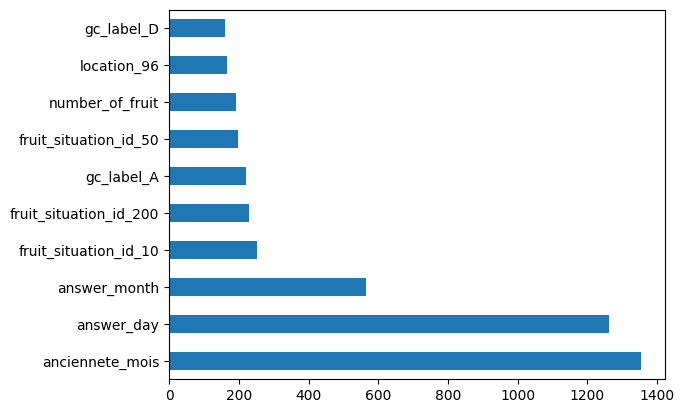

In [318]:
feat_importances = pd.Series(
    data = rcv.best_estimator_.feature_importances_,
    index = rcv.best_estimator_._final_estimator.feature_name_
    )

feat_importances.nlargest(10).plot(kind = 'barh')


# Annexe : Code pour calculer les métriques d'intersection, inclusion et entropie utilisé dans l'évaluation de l'exploitabilité des variables explicatives :



In [ ]:
intersections = {}

for col in test.columns:
    intersections[col] = [len(set(train[col]).intersection(set(test[col]))) / len(set(train[col]).union(set(test[col])))]

intersect = pd.DataFrame(intersections).T.rename(columns={0 : "intersection"})

inclusions = {}

for col in test.columns:
    inclusions[col] = [len(set(train[col]).intersection(set(test[col]))) / len(test[col].unique())]

inclusion = pd.DataFrame(inclusions).T.rename(columns={0 : "inclusion"})

import numpy as np

entropies = {}

for col in test.columns:
    pk = train[col].value_counts(normalize=True, dropna = False).values
    entropy = - (pk * np.log(pk) / np.log(len(train))).sum()
    entropies[col] = [entropy]

entropy = pd.DataFrame(entropies).T.rename(columns={0 : "entropy"})

metrics = pd.concat([intersect, inclusion, entropy], axis = 1)

def highlight_low_inclusion(value):
    if value > 0.95:
        return 'background-color: lightgreen'     
    else:
        return 'background-color: pink'
    
def highlight_low_entropy(value):
    if value > 0.1:
        return 'background-color: lightgreen'     
    else:
        return 'background-color: pink'

output = metrics.style.applymap(highlight_low_inclusion, subset=pd.IndexSlice[:, ['intersection', 'inclusion']])\
             .applymap(highlight_low_entropy, subset=pd.IndexSlice[:, ['entropy']])
